# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,StandardScaler

# building model
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier ,VotingClassifier
from sklearn.model_selection import cross_val_score , cross_val_predict ,RandomizedSearchCV

from xgboost import XGBClassifier

# tuning
from sklearn.model_selection import GridSearchCV 

# metrics
from sklearn.metrics import confusion_matrix


# Read Dataset

In [2]:
df = pd.read_csv('C:\\Users\\fagr\\Desktop\\ML_projects\\titanic\\train.csv')
df=pd.DataFrame(df)
x_test = pd.read_csv('C:\\Users\\fagr\\Desktop\\ML_projects\\titanic\\test.csv')
x_test = pd.DataFrame(x_test)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


''' PassengerId --> A unique identifier for each passenger.

Survived --> A binary variable indicating whether the passenger survived (1) or died (0).

Pclass --> A proxy for the socio-economic status of the passenger, with 1 being the highest class and 3 being the lowest class.

Name --> The name of the passenger, including titles and family names.

Sex --> The gender of the passenger, either male or female.

Age --> The age of the passenger in years, with fractional values for infants. Some values are missing.

SibSp --> The number of siblings and spouses of the passenger aboard the Titanic.

Parch --> The number of parents and children of the passenger aboard the Titanic.

Ticket --> The ticket number of the passenger.

Fare --> The amount of money paid by the passenger for the ticket, in British pounds.

Cabin --> The cabin number of the passenger. Some values are missing.

Embarked --> The port of embarkation of the passenger, with C = Cherbourg, Q = Queenstown, and S = Southampton. '''

In [4]:
# drop Name column
df = df.drop(columns = ['Name'] ,axis =1)
x_test = x_test.drop(columns = ['Name'] ,axis =1)

#drop duplicated rows
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  
0           A/5 21171   7.2500   NaN        S  
1            PC 17599  71.2833   C85        C  
2    STON/O2. 310128

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
# statistical
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# EDA

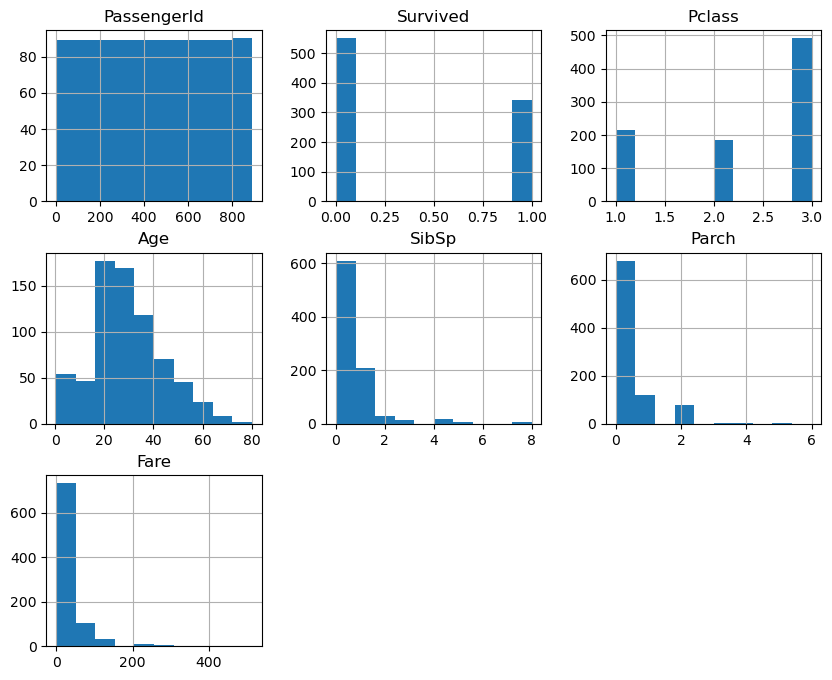

In [10]:
df.hist(figsize=(10,8));
plt.show()

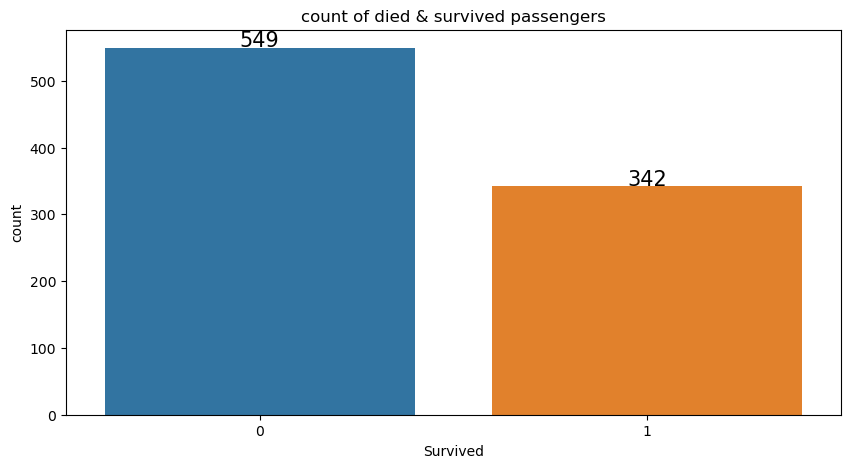

In [11]:
# count number of died & survived passengers

died_count = (df['Survived']==0).sum()
survived_count =( df['Survived'] == 1).sum()
count = [died_count ,survived_count]


plt.figure(figsize=(10,5))
sns.countplot(data =df ,x = 'Survived')
plt.ylabel('count')
plt.title('count of died & survived passengers')

# write count values
for i in range(2):
    plt.text(x=i, y=count[i]+2, s=count[i] , fontsize =15 , ha = 'center')
plt.show()

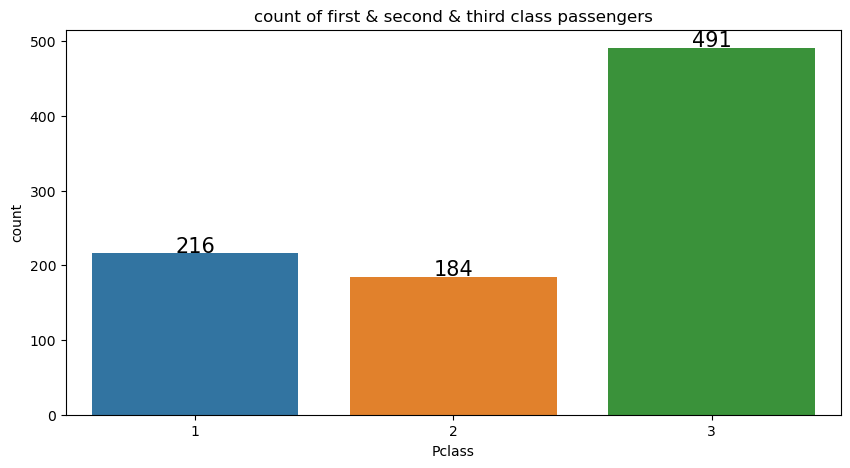

In [12]:
# count number of first & second & third class passengers

first_class = (df['Pclass']==1)
second_class =( df['Pclass'] == 2)
third_class = (df['Pclass']== 3)
count = [first_class.values.sum() ,second_class.values.sum() ,third_class.values.sum()]



plt.figure(figsize=(10,5))
sns.countplot(data =df ,x = 'Pclass')
plt.ylabel('count')
plt.title('count of first & second & third class passengers')

# write count values
for i in range(3):
    plt.text(x=i, y=count[i]+2, s=count[i] , fontsize =15 , ha = 'center')
plt.show()

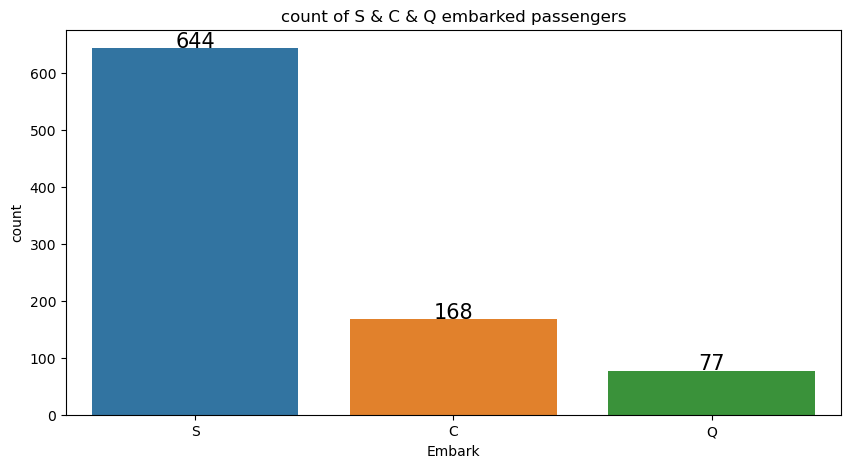

In [13]:
# count number of first & second & third class passengers

embarked_c = (df['Embarked']== 'C')
embarked_s =( df['Embarked'] == 'S')
embarked_q = (df['Embarked']=='Q')
count = [embarked_s.values.sum() ,embarked_c.values.sum() ,embarked_q.values.sum()]



plt.figure(figsize=(10,5))
sns.countplot(data =df ,x = 'Embarked')
plt.ylabel('count')
plt.xlabel('Embark')
plt.title('count of S & C & Q embarked passengers')

# write count values
for i in range(3):
    plt.text(x=i, y=count[i]+2, s=count[i] , fontsize =15 , ha = 'center')
plt.show()

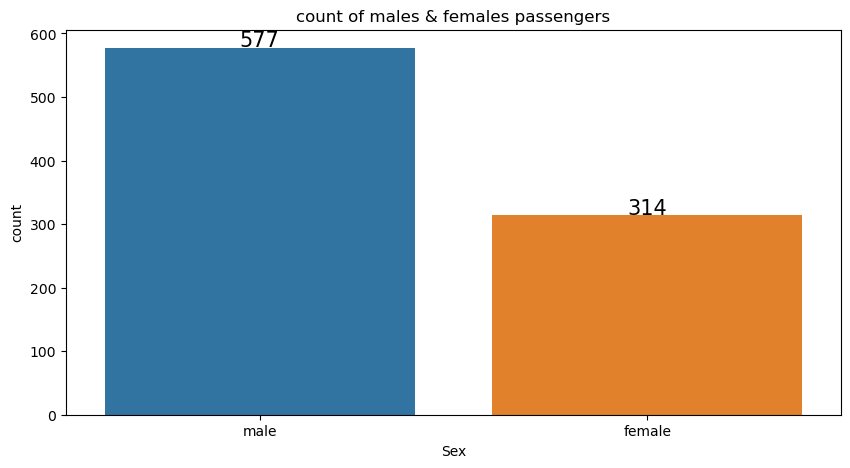

In [14]:
# count number of male & female passengers

male = (df['Sex']=='male')
female =( df['Sex'] == 'female')

count = [male.values.sum() ,female.values.sum()]



plt.figure(figsize=(10,5))
sns.countplot(data =df ,x = 'Sex')
plt.ylabel('count')
plt.title('count of males & females passengers')

# write count values
for i in range(2):
    plt.text(x=i, y=count[i]+2, s=count[i] , fontsize =15 , ha = 'center')
plt.show()

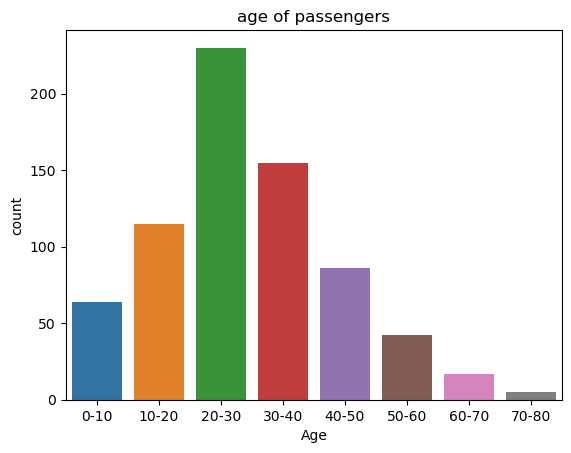

In [15]:
age = pd.cut(x = df['Age'] , bins = [0,10,20,30,40,50,60,70,80] , labels = ['0-10' ,'10-20' ,'20-30' ,'30-40' ,'40-50'
                                                                           ,'50-60' ,'60-70' ,'70-80'])
sns.countplot(data = df , x=  age)
plt.title("age of passengers")
plt.show()

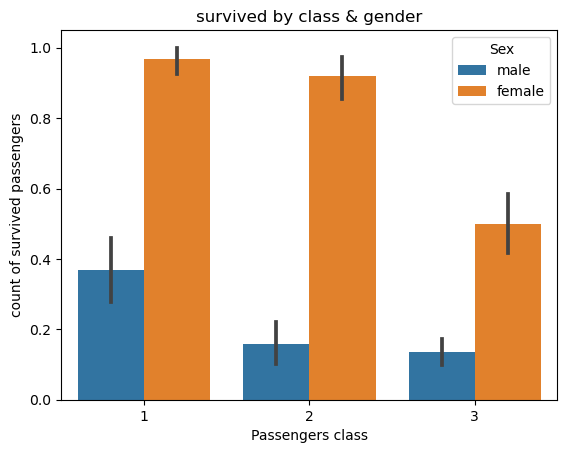

In [16]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title('survived by class & gender')
plt.xlabel('Passengers class')
plt.ylabel('count of survived passengers')
plt.show()

In [17]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

C:\Users\fagr\AppData\Local\Temp\ipykernel_14704\3059335393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,annot = True ,cmap = 'Blues' )


<Axes: >

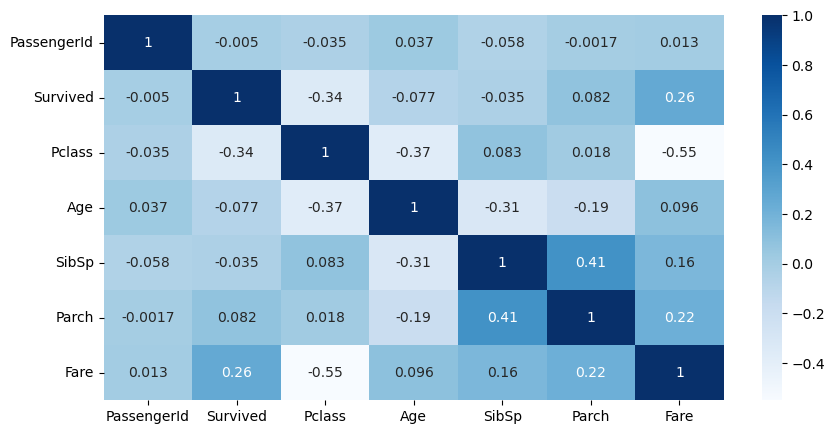

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() ,annot = True ,cmap = 'Blues' )

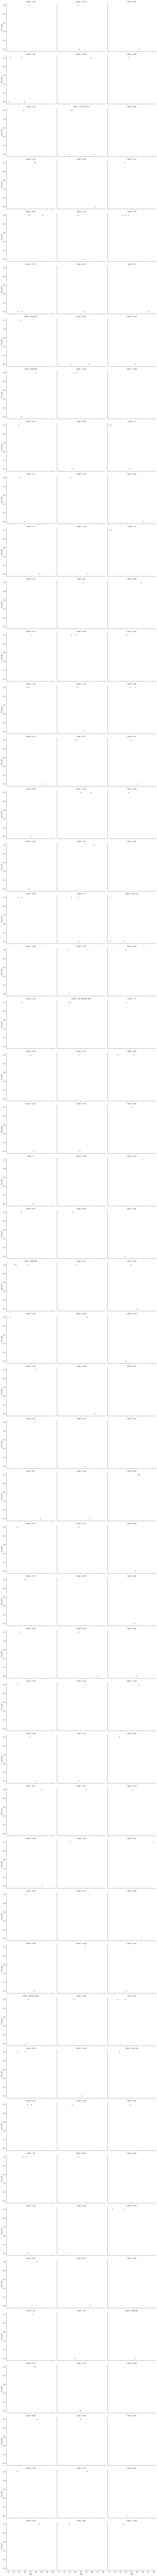

In [19]:
sns.relplot(x ='Age' , y='Survived' ,data =  df,  col = 'Cabin',col_wrap = 3);

''' Cabin feature has no effect on survival passengers'''

# Preprocessing

In [20]:
# drop passengerId & Cabin
df= df.drop(columns = ['PassengerId', 'Cabin'] ,axis =1)
x_test = x_test.drop(columns = ['PassengerId', 'Cabin'] ,axis =1)


In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [22]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [23]:
# fill Age column with median
imputer = SimpleImputer(strategy = 'median')
filled_age = imputer.fit_transform(df['Age'].values.reshape(-1,1))
df['Age'] = filled_age

filled_age_test = imputer.fit_transform(x_test['Age'].values.reshape(-1,1))
x_test['Age'] = filled_age_test

In [24]:
# fill Cabin column using forword fill method

df.fillna(method = 'ffill' ,inplace = True )
x_test.fillna(method = 'ffill' ,inplace = True )

In [25]:
# categorical columns
categ_cols_df = [col for col in df.columns if df[col].dtype not in ['float64','int64']]
categ_cols_test = [col for col in x_test.columns if x_test[col].dtype not in ['float64','int64']]

#numerical columns
numeric_cols_df = [col for col in df.columns if df[col].dtype  in ['float64','int64']]
numeric_cols_test = [col for col in x_test.columns if x_test[col].dtype  in ['float64','int64']]

In [26]:
numeric_cols_df

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [27]:
# apply label encoder on categorical columns
label = LabelEncoder()
for col in categ_cols_df:
    encoded_df = df
    encoded_df[col] = label.fit_transform(encoded_df[col])


for col in categ_cols_test:
    test_encoded = x_test
    test_encoded[col] = label.fit_transform(test_encoded[col])
encoded_df


<IPython.core.display.Javascript object>

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,28.0,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


# Split Data 

In [28]:
y_train= df['Survived']
encoded_df.drop(columns = ['Survived'], inplace=True)
encoded_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,2
887,1,0,19.0,0,0,14,30.0000,2
888,3,0,28.0,1,2,675,23.4500,2
889,1,1,26.0,0,0,8,30.0000,0


In [29]:
# standarize numerical colums
scaler = StandardScaler()

x_train = scaler.fit(encoded_df)
x_train = scaler.transform(encoded_df)

final_x_test = scaler.transform(test_encoded)

x_train = pd.DataFrame(x_train ,columns = encoded_df.columns)
final_x_test = pd.DataFrame(final_x_test ,columns = test_encoded.columns)

# Building Models

1.RandomForestClassifier

In [30]:
rndforst = RandomForestClassifier(n_estimators = 100 ,max_depth =10 ,random_state =42 ,min_samples_split= 2)

In [31]:
# tuning hyperparameters
param = {
    'n_estimators': np.arange(50 ,150 ,20) ,
    'max_depth': np.arange(3,7) ,
    'criterion' : ["gini", "entropy", "log_loss"] ,
    'min_samples_split': np.arange(2,5)
}

tuned = GridSearchCV( estimator = rndforst, param_grid = param ,scoring ='precision' ,cv =5)
tuned.fit(x_train ,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([ 50,  70,  90, 110, 130])},
             scoring='precision')

In [32]:
# best parameters 
tuned.best_params_


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [33]:
# apply randomforestclassification model using the best parameters
best_forest = tuned.best_estimator_


In [34]:
# apply cross validation (score ,predict) using precision 

scores = cross_val_score(estimator =best_forest ,X = x_train ,y = y_train ,cv = 5 ,scoring = 'precision')
print("scores: ",scores)
print("mean of sscores is: " ,scores.mean())


cross_pred = cross_val_predict(estimator =best_forest , X = x_train ,y =y_train ,cv =5 ,method = 'predict')

scores:  [0.85       0.83673469 0.92       0.88095238 0.91304348]
mean of sscores is:  0.8801461106181602


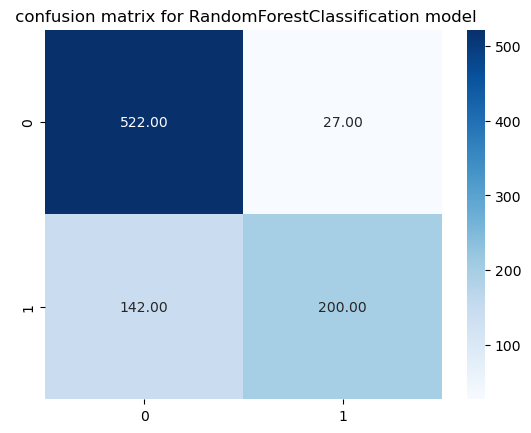

In [35]:
# show confusion matrix
confusion = confusion_matrix(y_train , cross_pred)
sns.heatmap(confusion , cmap = 'Blues' ,annot =True ,fmt = '.2f')
plt.title(" confusion matrix for RandomForestClassification model")
plt.show()

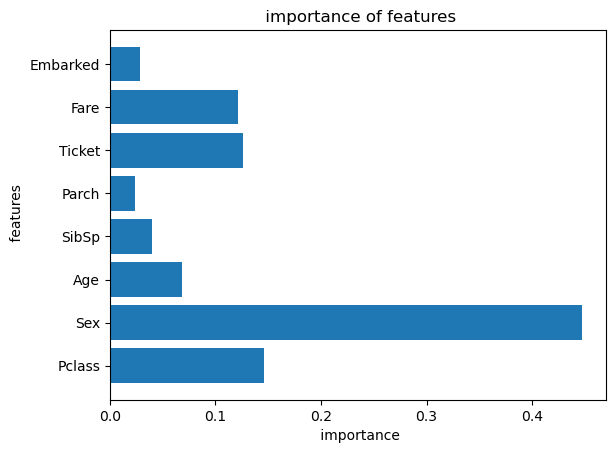

In [36]:
# show importance of features 
plt.barh(y = x_train.columns , width = best_forest.feature_importances_ ,data =x_train)
plt.title(" importance of features")
plt.xlabel(" importance")
plt.ylabel(" features")
plt.show()

In [37]:
best_forest.score(x_train ,y_train)

0.8249158249158249

2.XGBoost

In [38]:
xgb = XGBClassifier()

In [54]:
# tuning

params = {
    'n_estimators' : np.arange(10,20,2),
    'max_depth' : np.arange(3,8),
    'gamma' : np.arange(0.2,0.3,0.001),
    'learning_rate' : np.arange(0.1,1,0.3)
    
    
}
xgb_tuned = GridSearchCV(estimator = XGBClassifier(), param_grid = params ,cv =5 ,scoring = 'precision')
xgb_tuned.fit(x_train ,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
       0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26 , 0.261, 0.262,
       0.263, 0.264, 0.265, 0.266, 0.267, 0.268, 0.269, 0.27 , 0.271,
       0.272, 0.273, 0.274, 0.275, 0.276, 0.277, 0.278, 0.279, 0.28 ,
       0.281, 0.282, 0.283, 0.284, 0.285, 0.286, 0.287, 0.288, 0.289,
       0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298,
       0.299]),
                         'learning_rate': array([0.1, 0.4, 0.7]),
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'n_estimators': array([10, 12, 14, 16, 18])},
             scoring='precision')

In [55]:
# best parameters 
xgb_tuned.best_params_

{'gamma': 0.22800000000000004,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 10}

In [56]:
best_tuned = xgb_tuned.best_estimator_

In [57]:
# apply cross validation (score ,predict) using precision 

xgb_scores = cross_val_score(estimator =best_tuned ,X = x_train ,y = y_train ,cv = 5 ,scoring = 'precision')
print("scores: ",scores)
print("mean of sscores is: " ,scores.mean())


xgb_cross_pred = cross_val_predict(estimator =best_tuned , X = x_train ,y =y_train ,cv =5 ,method = 'predict')

scores:  [0.85       0.83673469 0.92       0.88095238 0.91304348]
mean of sscores is:  0.8801461106181602


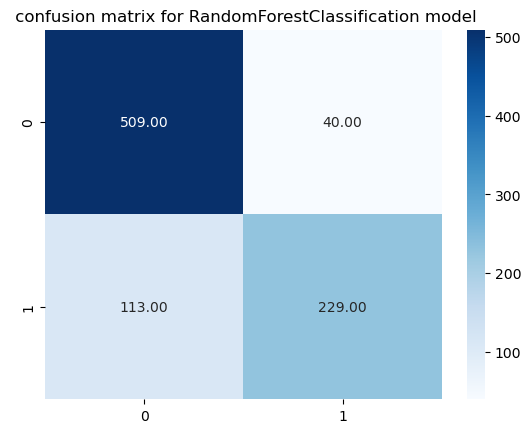

In [58]:
# show confusion matrix
confusion = confusion_matrix(y_train , xgb_cross_pred)
sns.heatmap(confusion , cmap = 'Blues' ,annot =True ,fmt = '.2f')
plt.title(" confusion matrix for RandomForestClassification model")
plt.show()

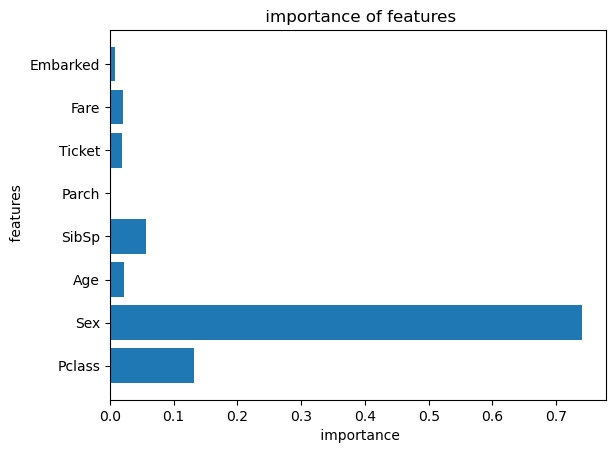

In [59]:
# show importance of features 
plt.barh(y = x_train.columns , width = best_tuned.feature_importances_ ,data =x_train)
plt.title(" importance of features")
plt.xlabel(" importance")
plt.ylabel(" features")
plt.show()

In [60]:
best_tuned.score(x_train ,y_train)

0.8922558922558923

 3.VotingClassifier

In [61]:
voting = VotingClassifier( estimators = [
    ('RandomForest' , best_forest) ,
    ('XGBoost' , best_tuned)]
)

voting.fit(x_train ,y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     n_estimators=50,
                                                     random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None...
                                            gamma=0.22800000000000004,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [64]:
# apply cross validation (score ,predict) using precision 

vot_scores = cross_val_score(estimator =voting ,X = x_train ,y = y_train ,cv = 5 ,scoring = 'precision')
print("scores: ",scores)
print("mean of sscores is: " ,scores.mean())


vot_cross_pred = cross_val_predict(estimator =voting , X = x_train ,y =y_train ,cv =5 ,method = 'predict')

scores:  [0.85       0.83673469 0.92       0.88095238 0.91304348]
mean of sscores is:  0.8801461106181602


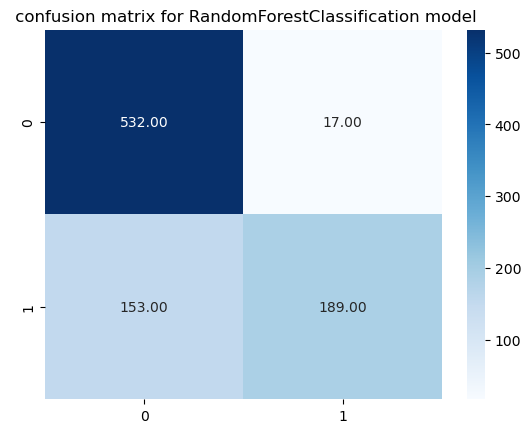

In [65]:
# show confusion matrix
confusion = confusion_matrix(y_train , vot_cross_pred)
sns.heatmap(confusion , cmap = 'Blues' ,annot =True ,fmt = '.2f')
plt.title(" confusion matrix for RandomForestClassification model")
plt.show()

In [66]:
voting.score(x_train ,y_train)

0.8282828282828283

# Predict test data

In [67]:
y_pred_test = best_forest.predict(x_test)

In [70]:
pd.DataFrame(y_pred_test ,columns = ['Prediction'])

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0
